In [ ]:
#Importação das Bibliotecas
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt,modf
import math

In [ ]:
!pip install wget
!wget https://raw.githubusercontent.com/JdrNc/repositorioCienciaDeDados/main/gata2.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-28 02:49:32--  https://raw.githubusercontent.com/JdrNc/repositorioCienciaDeDados/main/gata2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51481 (50K) [text/plain]
Saving to: ‘gata2.csv’

gata2.csv           100%[===================>]  50.27K  --.-KB/s    in 0.001s  

2022-10-28 02:49:33 (34.4 MB/s) - ‘gata2.csv’ saved [51481/51481]



In [ ]:
dataframe = pd.read_csv("gata2.csv", sep = ",")

dataframe.head()

,iso_code,iso_code.1,new_deaths_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,excess_mortality,excess_mortality_cumulative_per_million
0,BRA,South America,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
1,BRA,South America,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
2,BRA,South America,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
3,BRA,South America,0.0,0.0,0.0,0.0,0.0,3.12,11.326659
4,BRA,South America,0.0,0.0,0.0,0.0,0.0,0.00,0.000000


In [ ]:
dataframe = dataframe.dropna()

dataframe = dataframe.drop(columns=['iso_code','iso_code.1'])

dataframe.head()

,new_deaths_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,excess_mortality,excess_mortality_cumulative_per_million
0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
3,0.0,0.0,0.0,0.0,0.0,3.12,11.326659
4,0.0,0.0,0.0,0.0,0.0,0.00,0.000000


In [ ]:
count_row = dataframe.shape[0] #Pegando os números de registros
count_col = dataframe.shape[1] #Pegando os números de colunas
colunas = ['people_vaccinated','new_deaths']

print(count_row)
print(count_col)

970
7


In [ ]:
#Normalizando os dados
dataframe_normalizado = dataframe.copy() 
for column in dataframe_normalizado.columns: 
    dataframe_normalizado[column] = (dataframe_normalizado[column] - dataframe_normalizado[column].min()) / (dataframe_normalizado[column].max() - dataframe_normalizado[column].min())

print(dataframe_normalizado)

     new_deaths_smoothed_per_million  total_vaccinations  people_vaccinated  \
0                           0.000000            0.000000                0.0   
1                           0.000000            0.000000                0.0   
2                           0.000000            0.000000                0.0   
3                           0.000000            0.000000                0.0   
4                           0.000000            0.000000                0.0   
..                               ...                 ...                ...   
967                         0.016252            0.999999                1.0   
968                         0.017561            1.000000                1.0   
969                         0.017561            1.000000                1.0   
970                         0.017561            1.000000                1.0   
971                         0.019764            1.000000                1.0   

     people_fully_vaccinated  new_deaths  excess_mo

In [ ]:
#Selecionando Variaveis

pessoas_vacinadas = dataframe_normalizado[['people_vaccinated']]

novas_mortes = dataframe_normalizado[['new_deaths']]

pessoas_vacinadas.head()


,people_vaccinated
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
pessoas_vacinadas_teste,pessoas_vacinadas_treino,novas_mortes_teste,novas_mortes_treino = train_test_split(pessoas_vacinadas,novas_mortes,train_size = 0.2, random_state = 42)

pessoas_vacinadas_treino.head()

pessoas_vacinadas_treino_seq = np.linspace(pessoas_vacinadas_treino.min(),pessoas_vacinadas_treino.max(),970).reshape(-1,1)

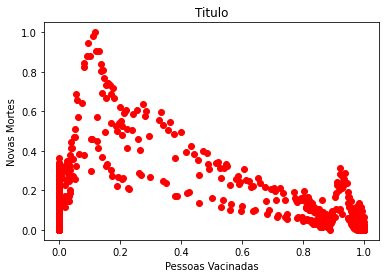

In [ ]:
plt.scatter(pessoas_vacinadas_treino,novas_mortes_treino,color = "red")
plt.title("Titulo")
plt.xlabel("Pessoas Vacinadas")
plt.ylabel("Novas Mortes")
plt.show()

In [ ]:
modelo = make_pipeline(PolynomialFeatures(11,include_bias = False),LinearRegression())

modelo.fit(pessoas_vacinadas_treino,novas_mortes_treino)


Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=11, include_bias=False)),
                ('linearregression', LinearRegression())])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


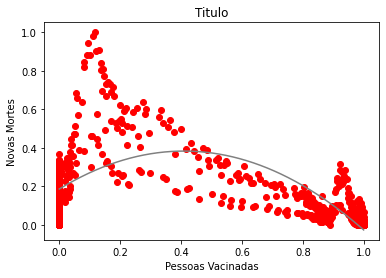

In [ ]:
plt.scatter(pessoas_vacinadas_treino,novas_mortes_treino,color = "red")
plt.plot(pessoas_vacinadas_treino_seq,modelo.predict(pessoas_vacinadas_treino_seq),color="gray")
plt.title("Titulo")
plt.xlabel("Pessoas Vacinadas")
plt.ylabel("Novas Mortes")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


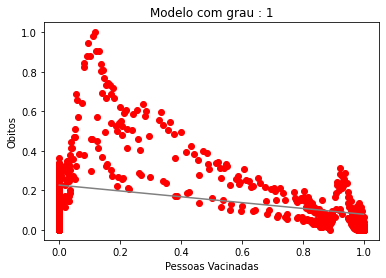

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


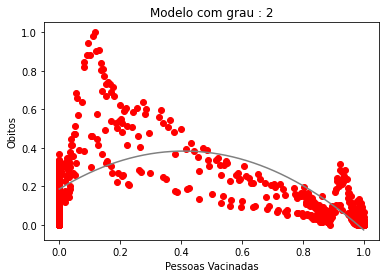

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


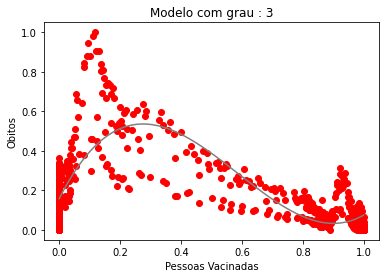

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


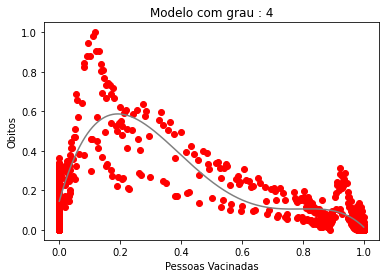

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


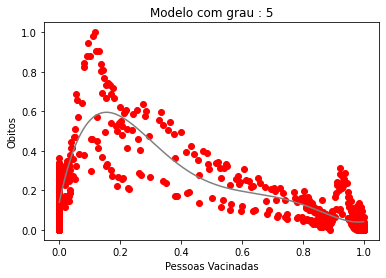

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


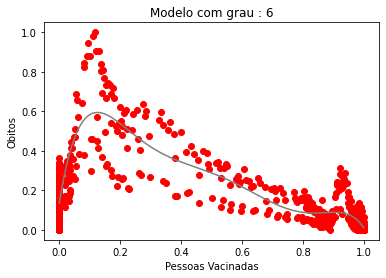

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


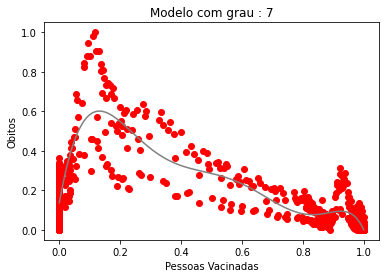

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


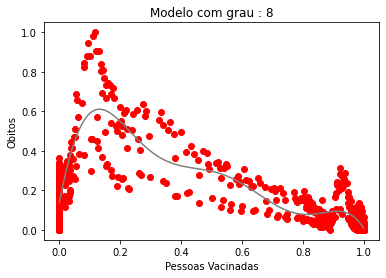

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


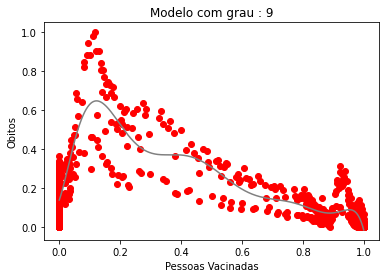

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


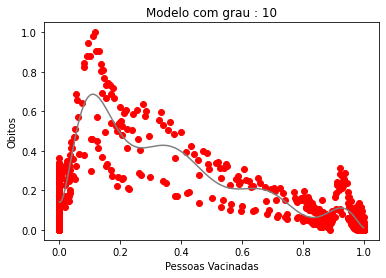

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


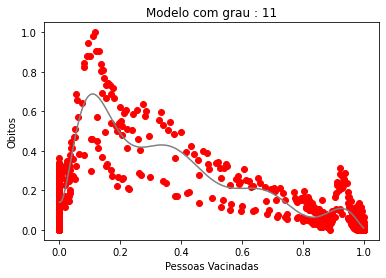

In [ ]:
for coefficient in range(1,12):
  modelo = make_pipeline(PolynomialFeatures(coefficient,include_bias=False),LinearRegression())
  modelo.fit(pessoas_vacinadas_treino,novas_mortes_treino)
  plt.figure()
  plt.title("Modelo com grau : %d" % coefficient)
  plt.scatter(pessoas_vacinadas_treino,novas_mortes_treino,color = 'red')
  plt.plot(pessoas_vacinadas_treino_seq,modelo.predict(pessoas_vacinadas_treino_seq),color="gray")
  plt.xlabel('Pessoas Vacinadas')
  plt.ylabel('Obitos')
  plt.show()

In [ ]:
#Executar no Dataset de teste

preverMortes = modelo.predict(pessoas_vacinadas_teste)

In [ ]:
#Avaliar o modelo
print('Soma dos Erros ao Quadrado (SSE): %.2f' % np.sum((preverMortes - novas_mortes_teste))**2)
print('Erro Quadratico Médio (MSE): %.2f' % mean_squared_error(novas_mortes_teste,preverMortes))
print('Erro Médio Absoluto (EMA): %.2f' % mean_absolute_error(novas_mortes_teste,preverMortes))
print('Raiz do Erro Quadratico Médio (RMSE): %.2f' % sqrt(mean_squared_error(novas_mortes_teste,preverMortes)))
print('R2 - Score: %.2f' % r2_score(preverMortes,novas_mortes_teste ) )

Soma dos Erros ao Quadrado (SSE): 1.54
Erro Quadratico Médio (MSE): 0.01
Erro Médio Absoluto (EMA): 0.08
Raiz do Erro Quadratico Médio (RMSE): 0.10
R2 - Score: 0.56


In [ ]:
total_de_pessoas_vacinadas = float(input("Digite a porcentagem da população vacinada\n"))

total_de_pessoas_vacinadas = modelo.predict([[total_de_pessoas_vacinadas]])

print("O total de obitos é %f" % total_de_pessoas_vacinadas[0][0])

Digite a porcentagem da população vacinada
2
O total de obitos é 398970.935747


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
